# Análise Exploratória de Dados

* Como os valores de alugueis estão distribuidos?
* Existe relação entre o número de quartos e o valor do aluguel?
* O que podemos observar sobre a possibilidade de aceitar animais?
* Qual a relação entre cidades e os números de quartos?
* Imóvel mobiliado impacta no preço do aluguel?
* Como estão distribuidos os imóveis por número de banheiros?
* Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?
* E o seguro incêndio?
* Existe qualquer impacto do valor do iptu em relação ao valor imóvel?

Corrigir data types no filtro e cidade Belo Horizonte.

Importando as bibliotecas necessárias

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

Carregando a Base de Dados

In [65]:
connect_dw_imoveis = sqlite3.connect("../data/imoveis_dw.db")

In [66]:
data = pd.read_sql_query(r"""
    SELECT * FROM IMOVEIS
    """, 
    connect_dw_imoveis
    )

In [67]:
data.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

Exibindo as informações da base de dados

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cidade                 10692 non-null  object
 1   estado                 10692 non-null  object
 2   area                   10692 non-null  int64 
 3   num_quartos            10692 non-null  int64 
 4   num_banheiros          10692 non-null  int64 
 5   garagem                10692 non-null  int64 
 6   num_andares            10692 non-null  int64 
 7   aceita_animais         10692 non-null  int64 
 8   mobilia                10692 non-null  int64 
 9   valor_aluguel          10692 non-null  int64 
 10  valor_condominio       10692 non-null  int64 
 11  valor_iptu             10692 non-null  int64 
 12  valor_seguro_incendio  10692 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.1+ MB


Análise Estatística Básica.

In [69]:
data.describe()

area   num_quartos  num_banheiros       garagem   num_andares  \
count  10692.000000  10692.000000   10692.000000  10692.000000  10692.000000   
mean     149.217920      2.506079       2.236813      1.609147      5.298167   
std      537.016942      1.171266       1.407198      1.589521      5.888747   
min       11.000000      1.000000       1.000000      0.000000      1.000000   
25%       56.000000      2.000000       1.000000      0.000000      1.000000   
50%       90.000000      2.000000       2.000000      1.000000      3.000000   
75%      182.000000      3.000000       3.000000      2.000000      8.000000   
max    46335.000000     13.000000      10.000000     12.000000    301.000000   

       aceita_animais       mobilia  valor_aluguel  valor_condominio  \
count    10692.000000  10692.000000   10692.000000      1.069200e+04   
mean         0.777778      0.243734    3896.247194      1.174022e+03   
std          0.415759      0.429354    3408.545518      1.559231e+04   
min          0.000000      0.000000     450.000000      0.000000e+00   
25%          1.000000      0.000000    1530.000000      1.700000e+02   
50%          1.000000      0.000000    2661.000000      5.600000e+02   
75%          1.000000      0.000000    5000.000000      1.237500e+03   
max          1.000000      1.000000   45000.000000      1.117000e+06   

          valor_iptu  valor_seguro_incendio  
count   10692.000000           10692.000000  
mean      366.704358              53.300879  
std      3107.832321              47.768031  
min         0.000000               3.000000  
25%        38.000000              21.000000  
50%       125.000000              36.000000  
75%       375.000000              68.000000  
max    313700.000000             677.000000

In [70]:
## Presença de outliers??
## Variação muito alta do valor do aluguel (variável que utilizaremos na predição)

Verificando a correlação dos atributos

<AxesSubplot:>

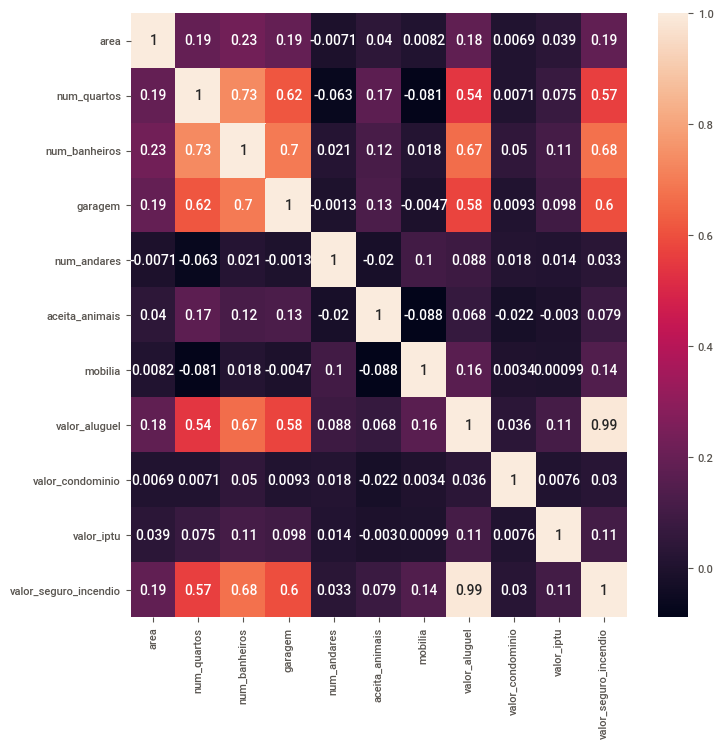

In [71]:
plt.figure(figsize =(8,8))
cor = data.corr()
sns.heatmap(cor,annot =True)

Visualizando as correlações em pares

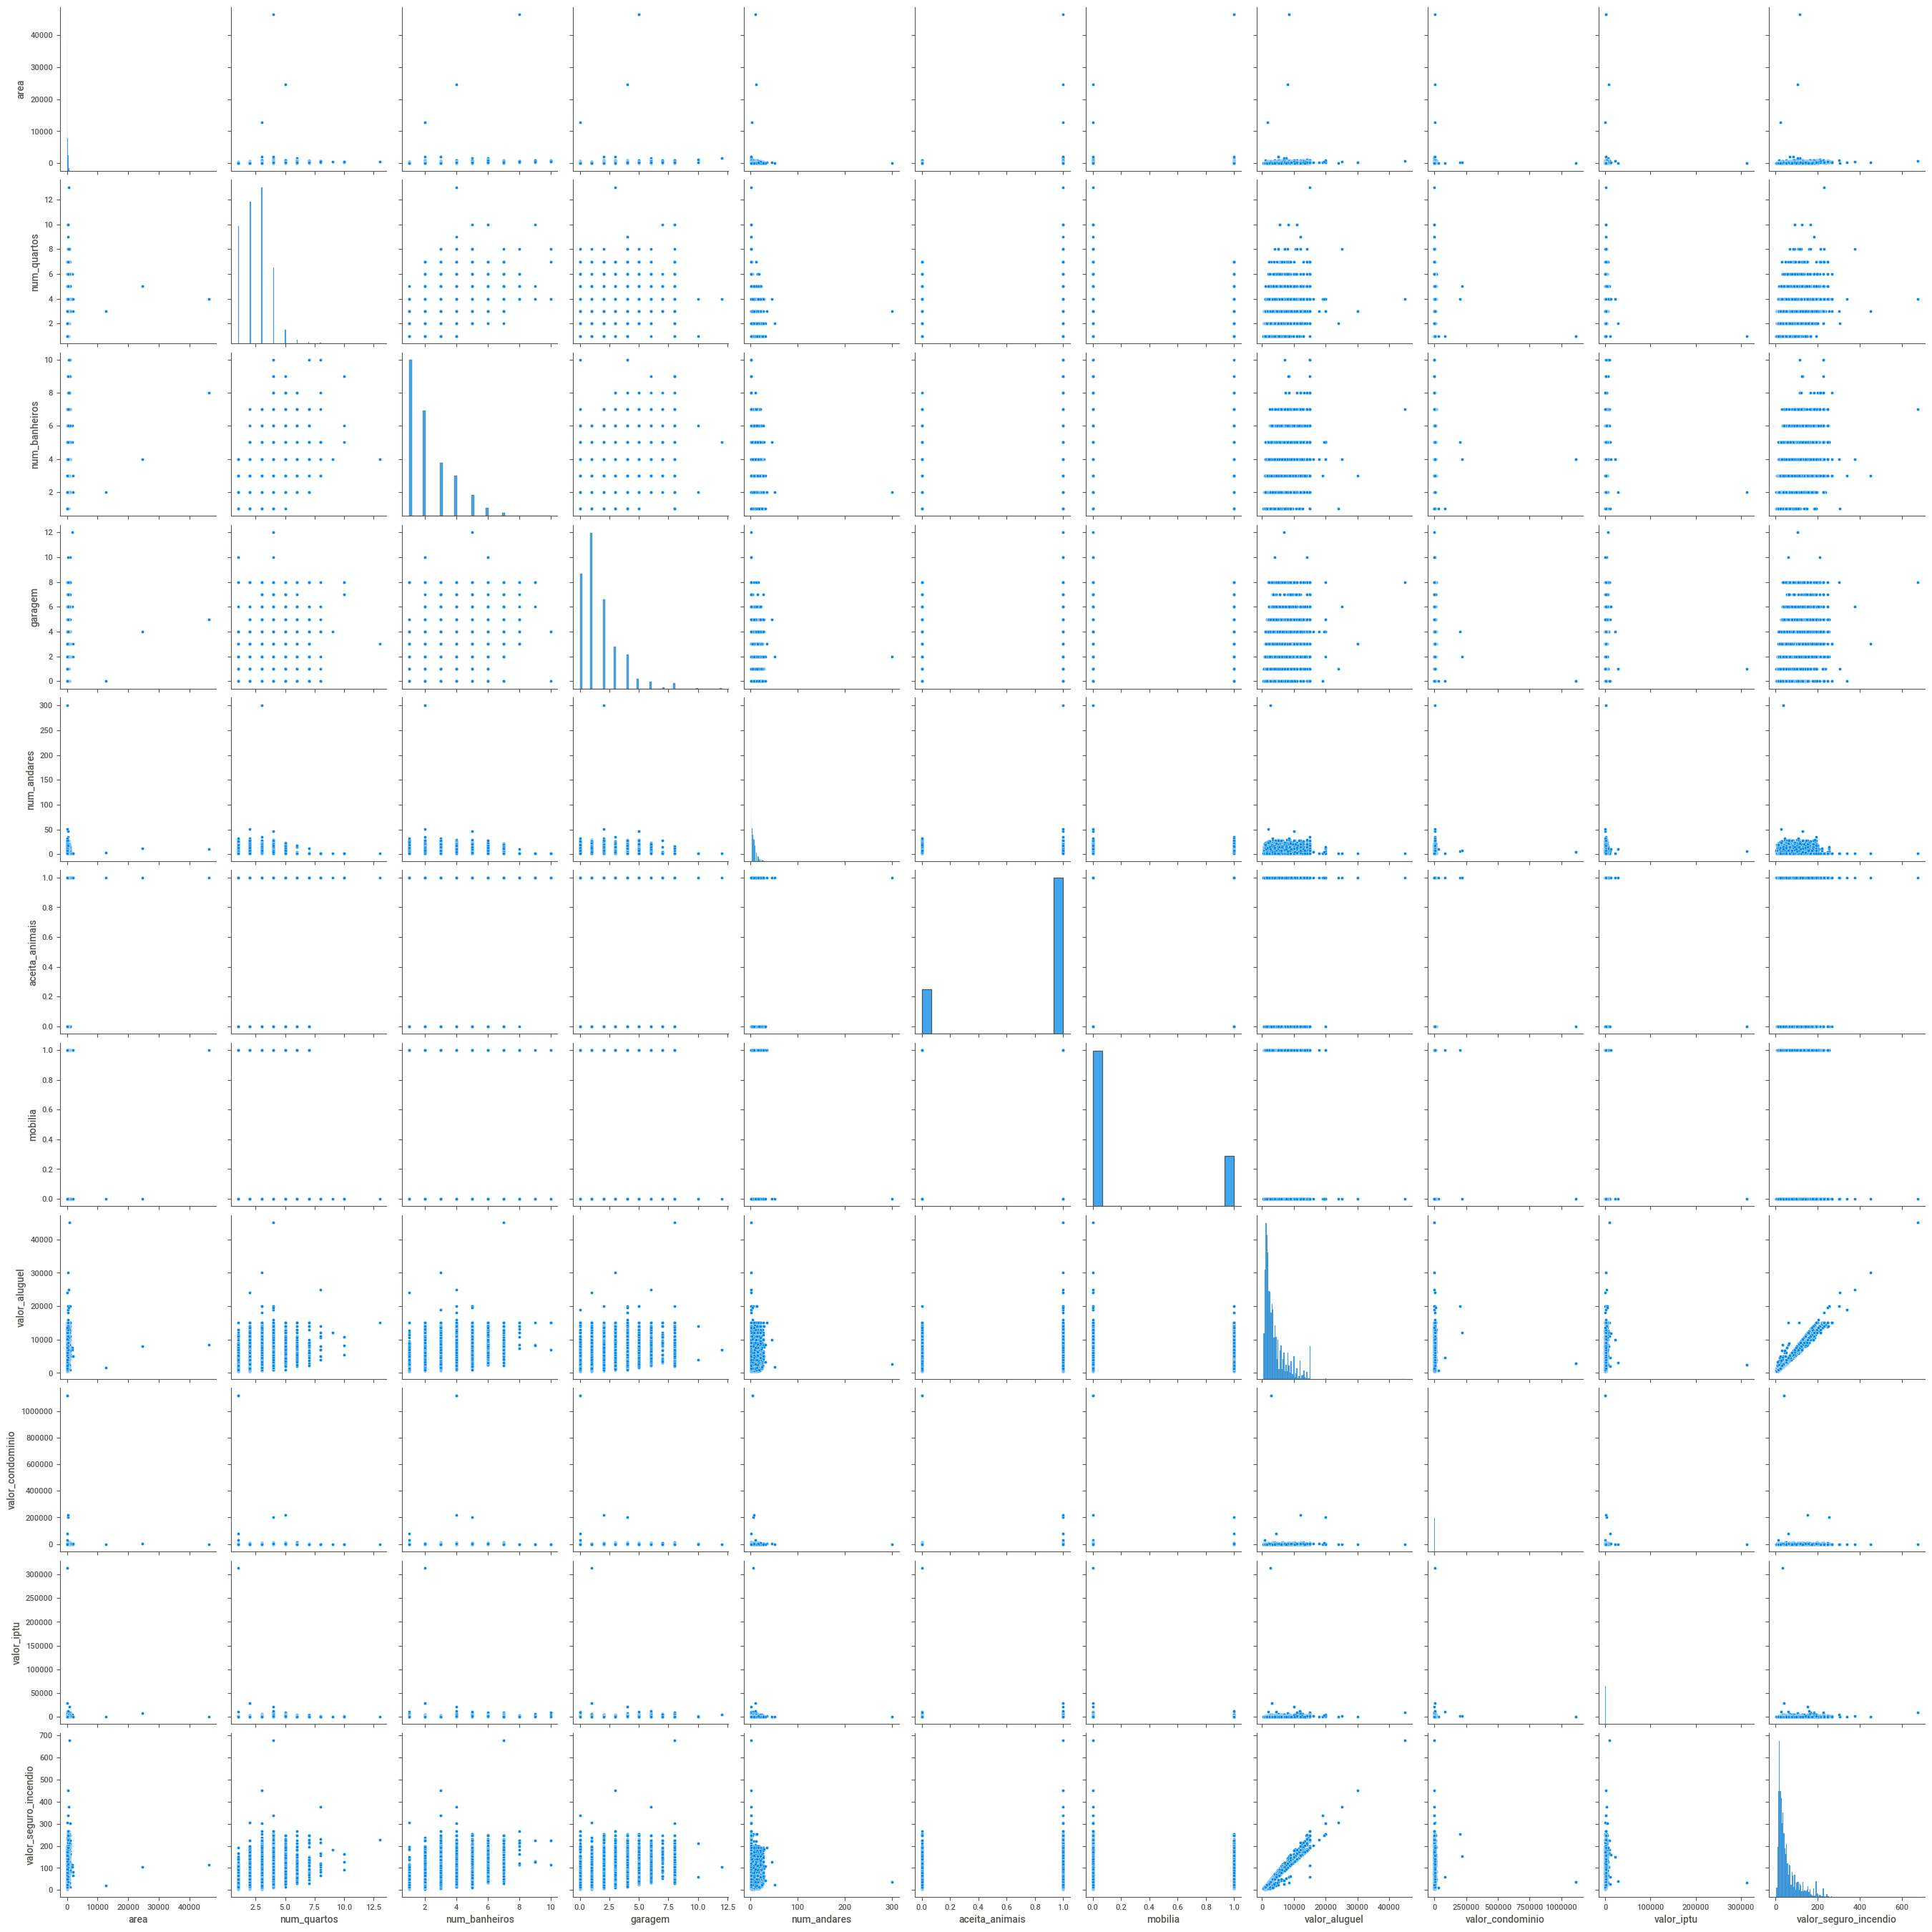

In [72]:
sns.pairplot(data)

In [73]:
## Conforme o valor do aluguel aumento, o valor do seguro incêndio também aumenta.

In [74]:
!pip install sweetviz

In [75]:
import sweetviz as sv

my_report = sv.analyze(data,"valor_aluguel") ## observar como todos os atributos se relacionam com o atributo alvo (valor_aluguel)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



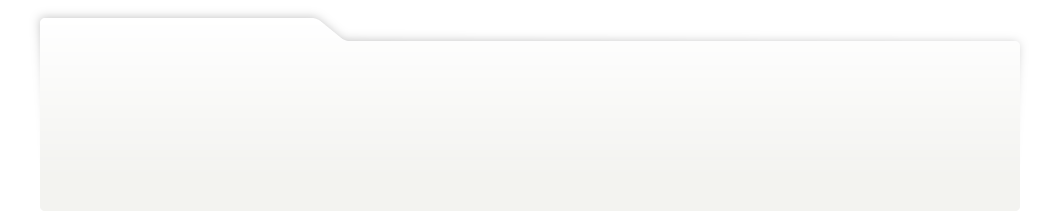
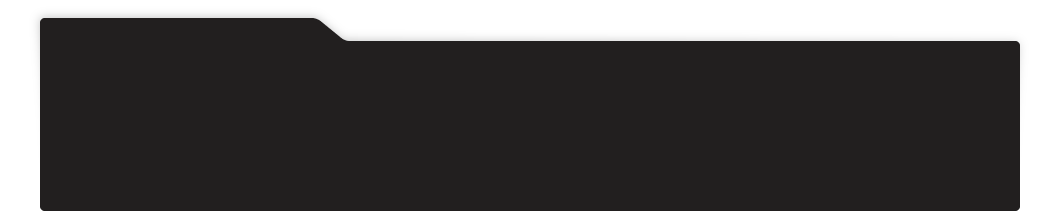
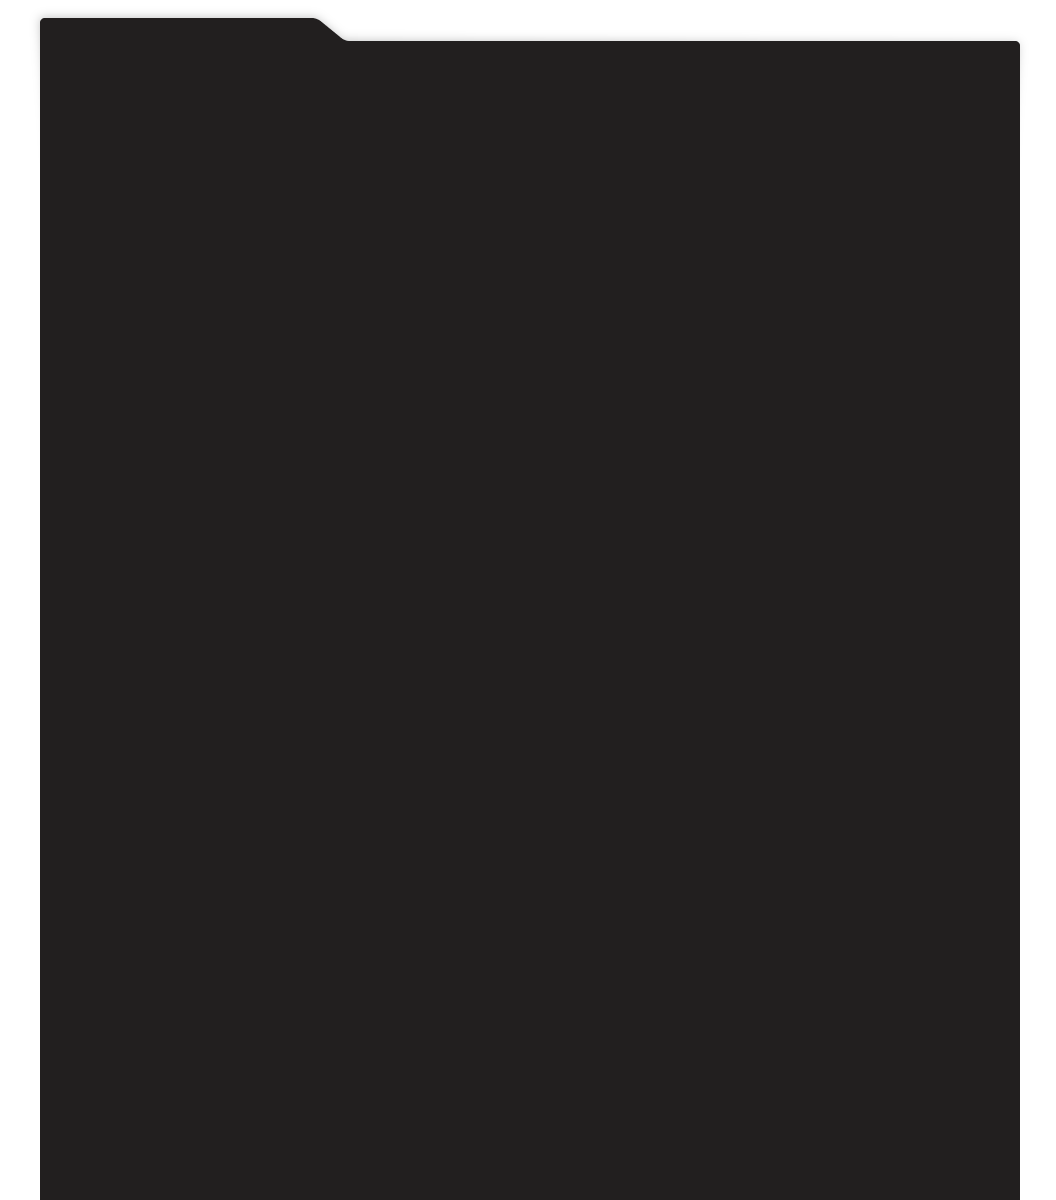
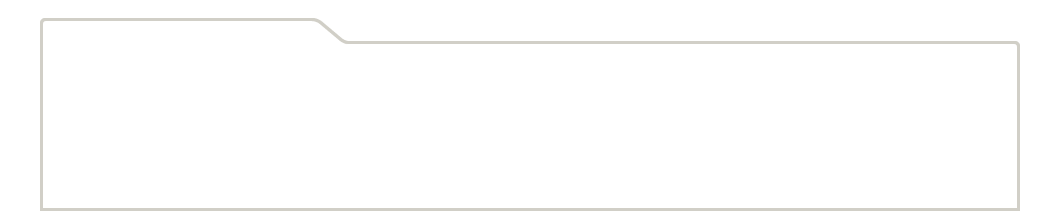
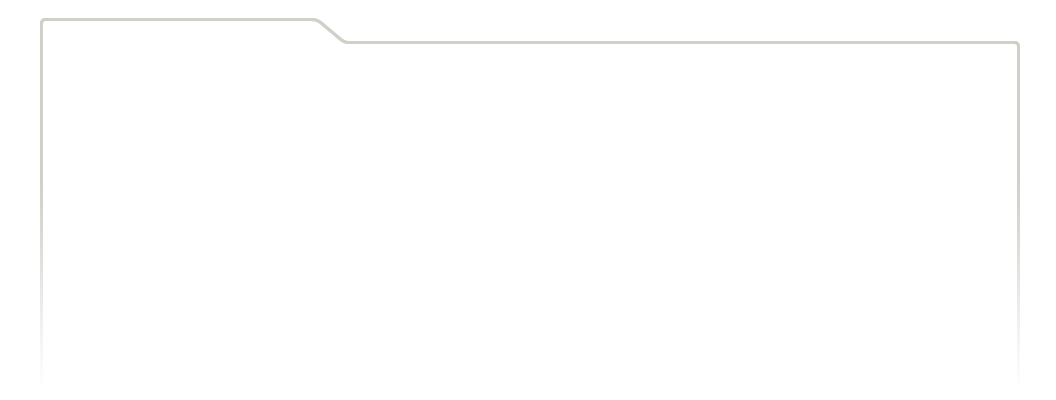
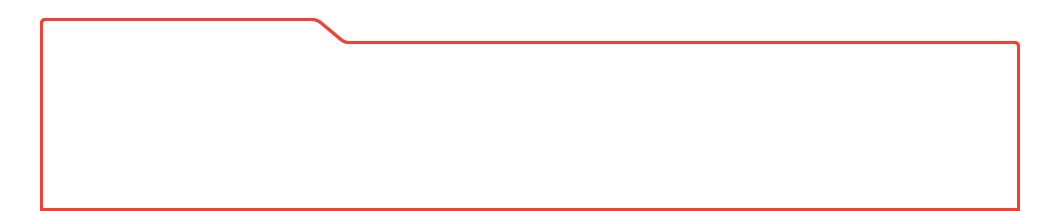
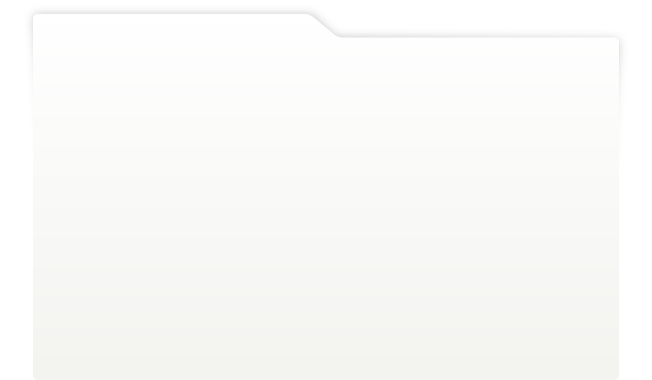
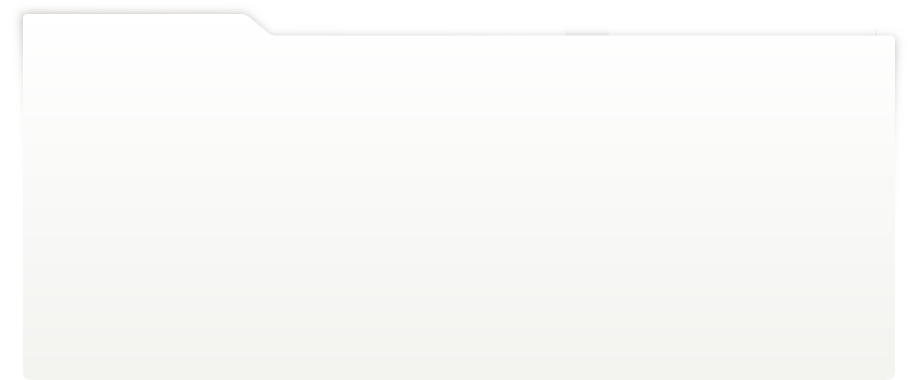
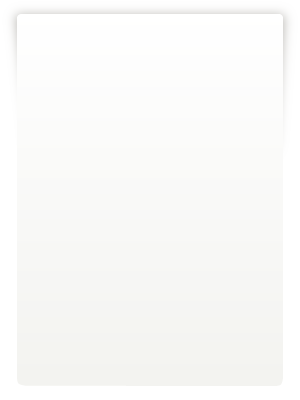
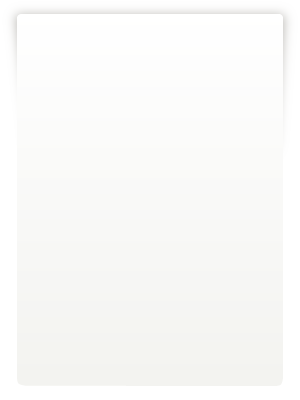
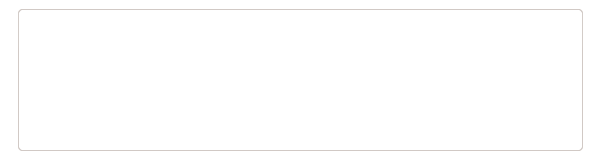
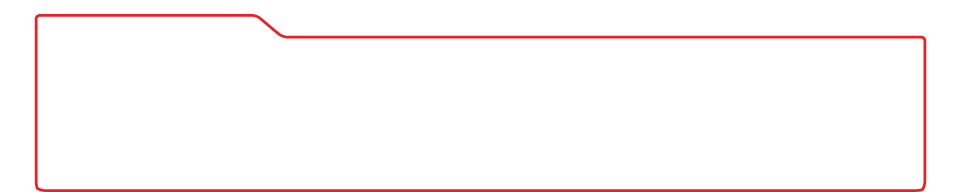
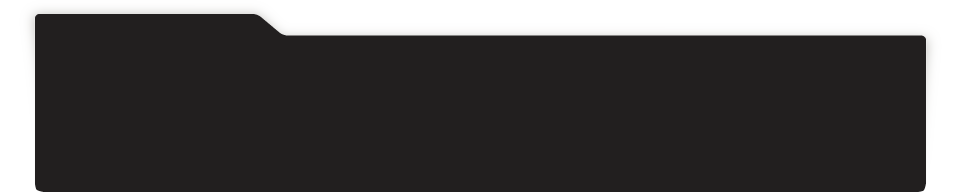
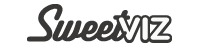
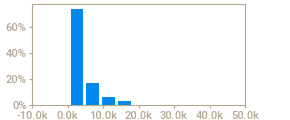
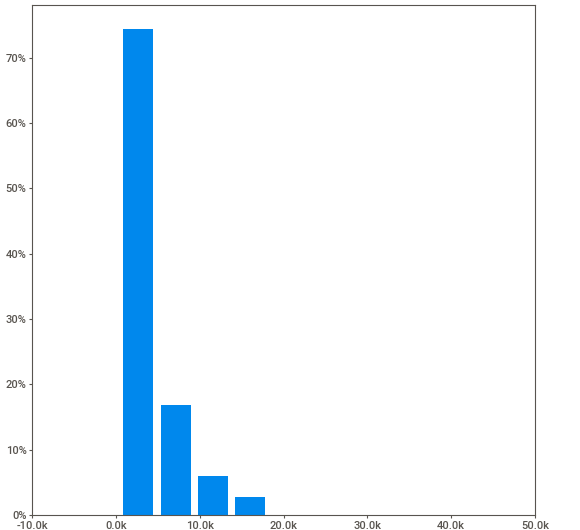
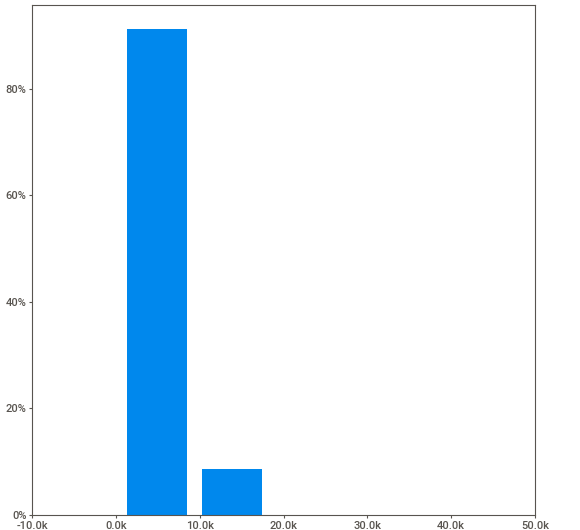
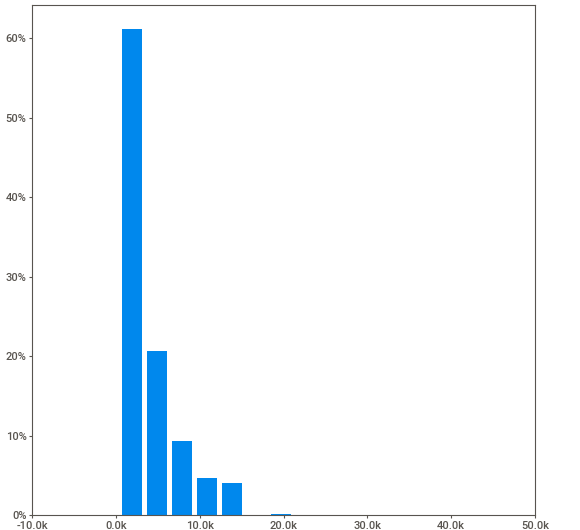
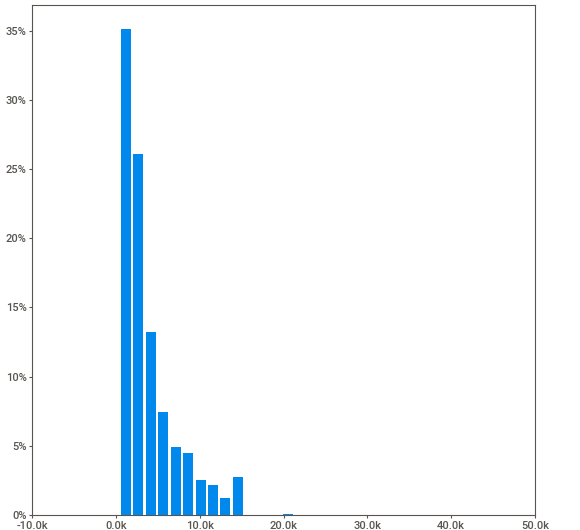
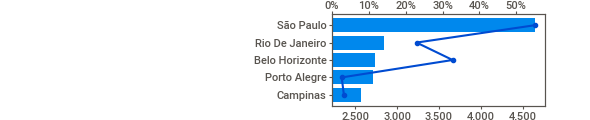
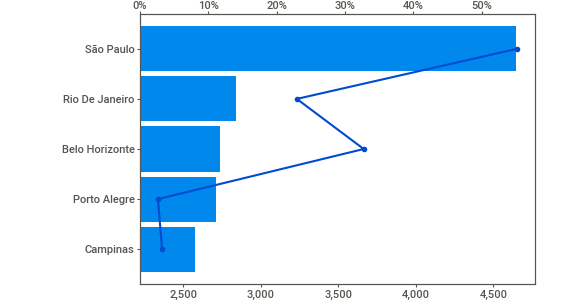
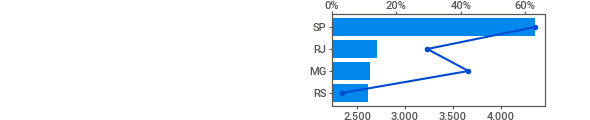
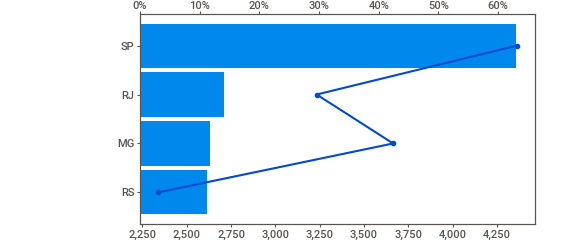
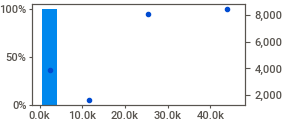
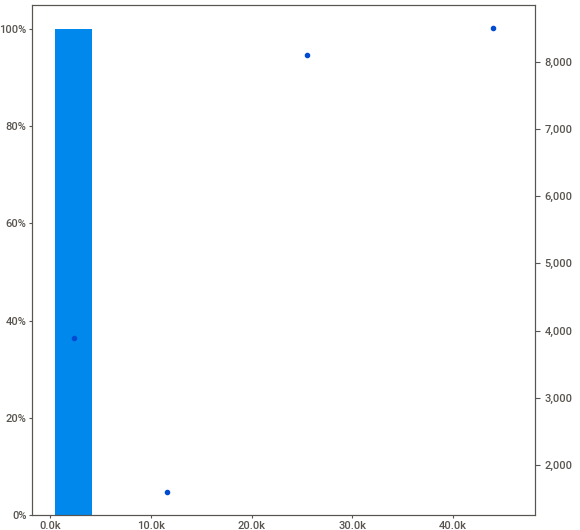
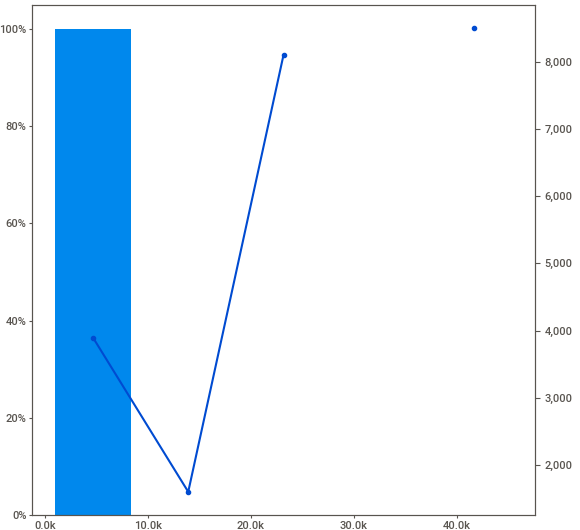
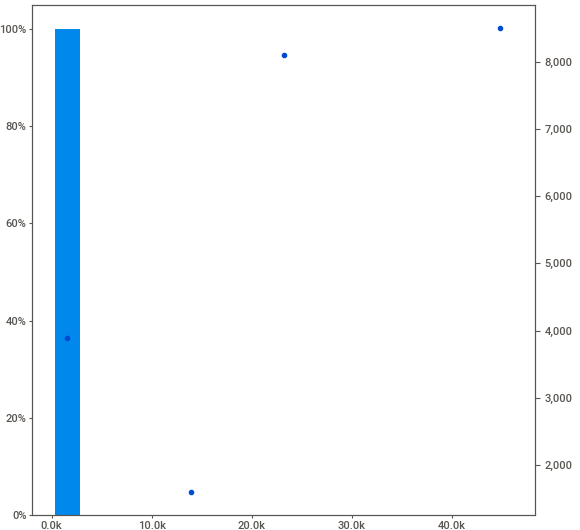
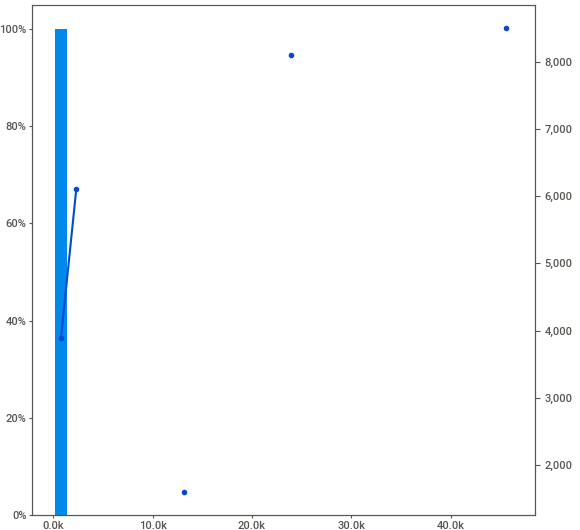
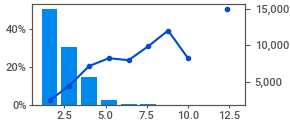
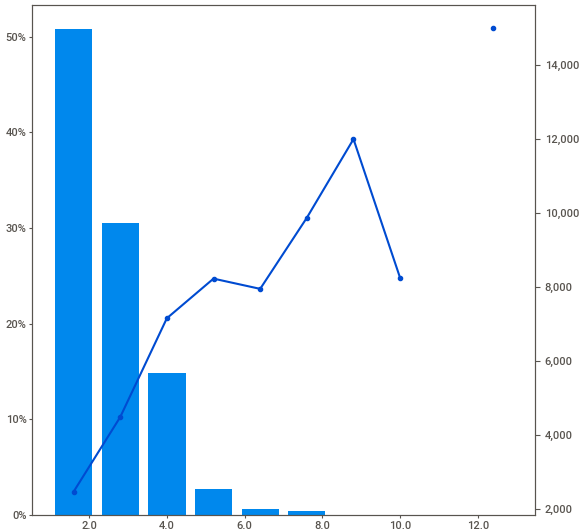
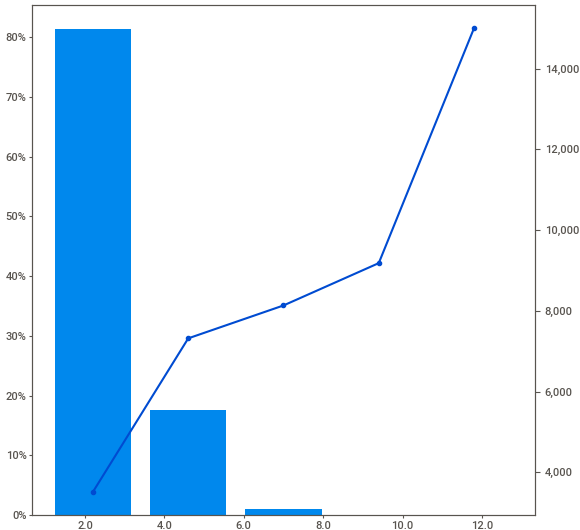
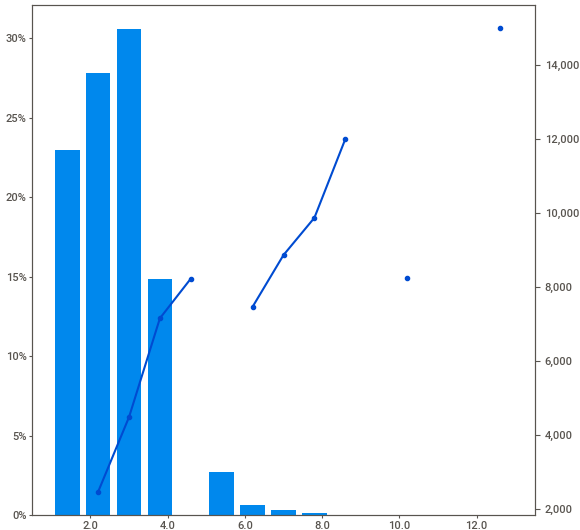
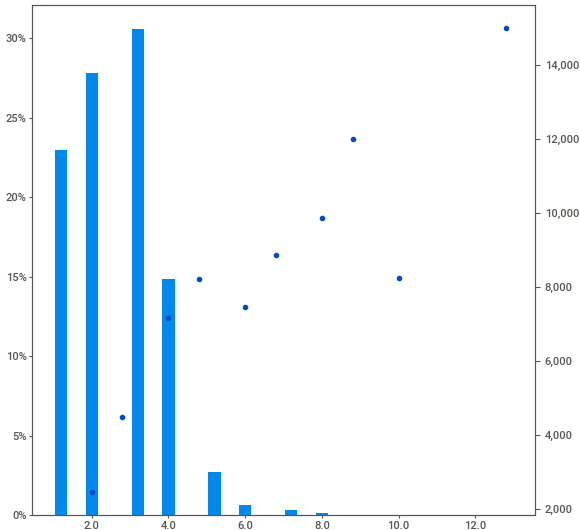
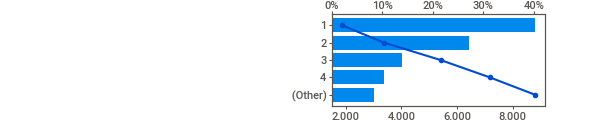
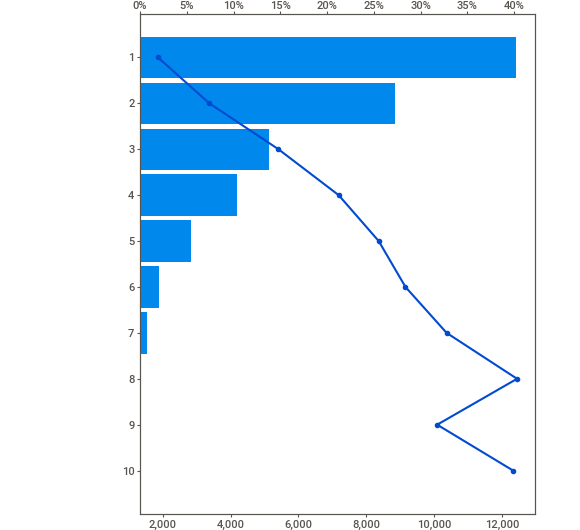
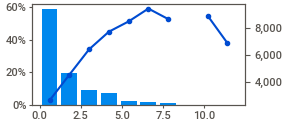
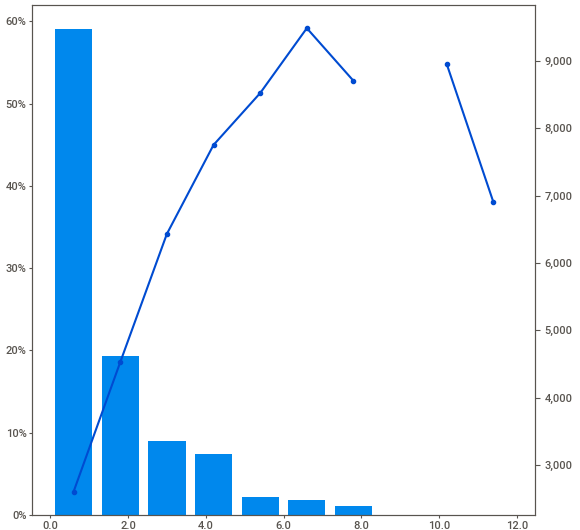
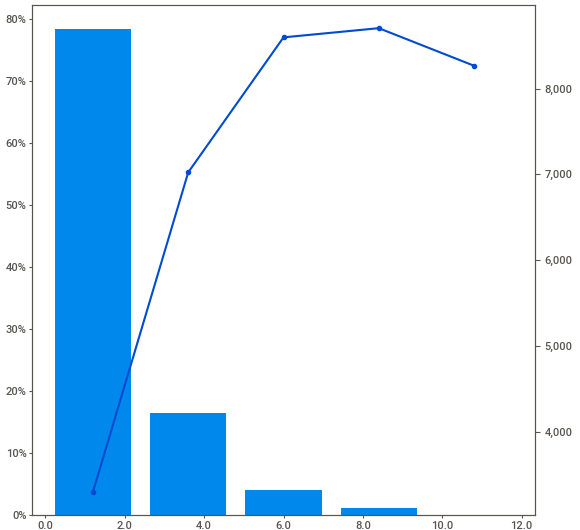
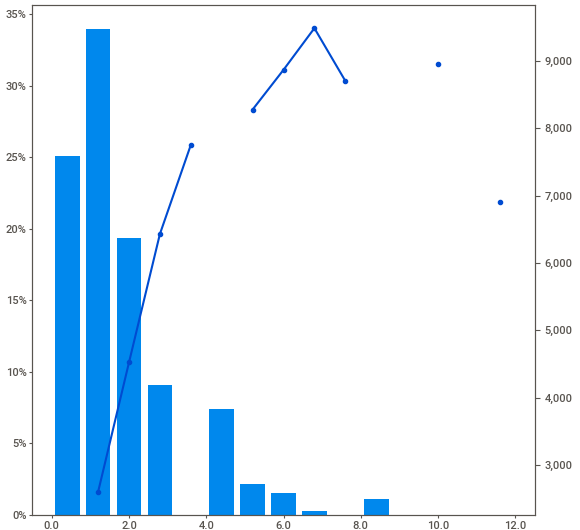
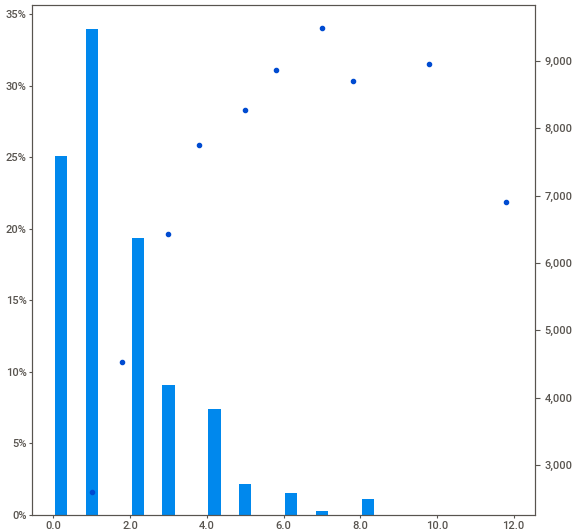
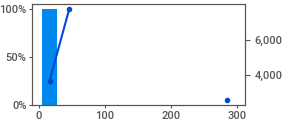
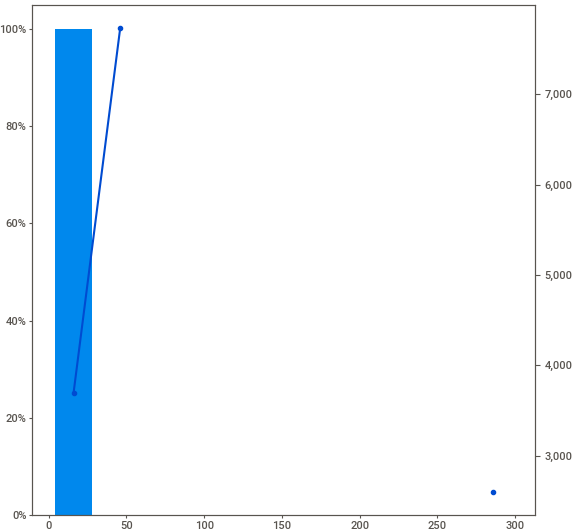
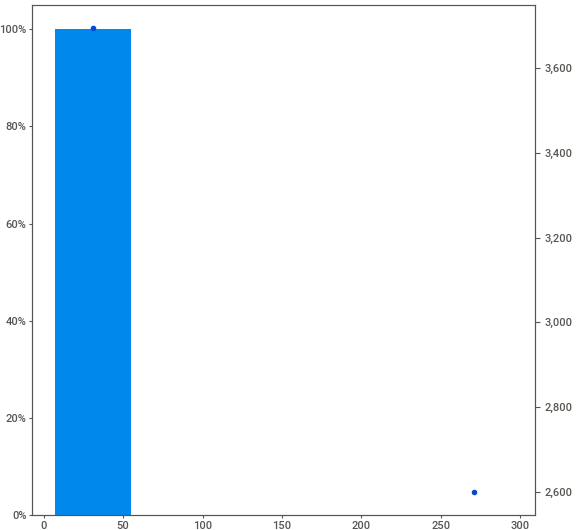
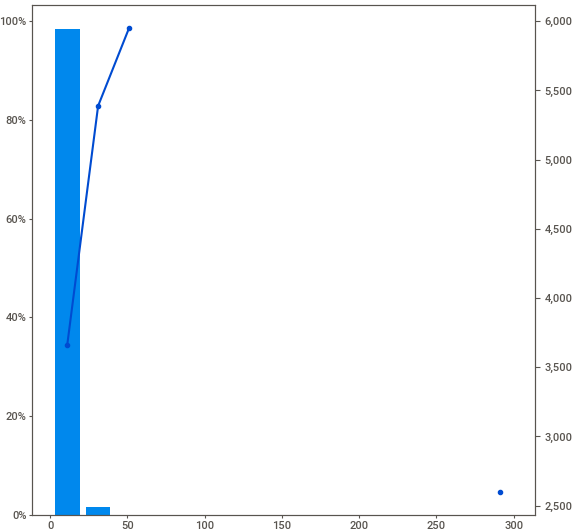
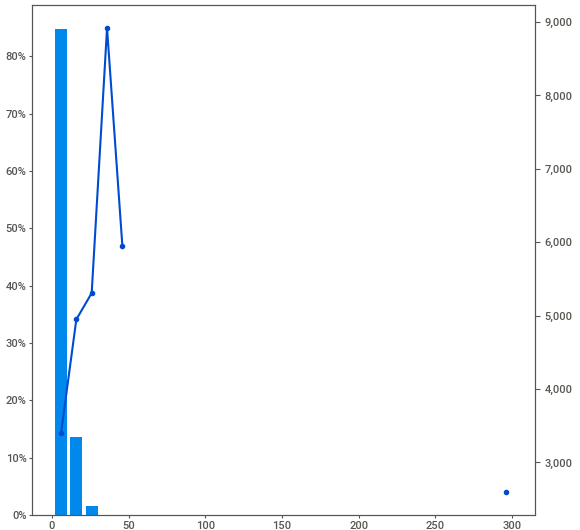
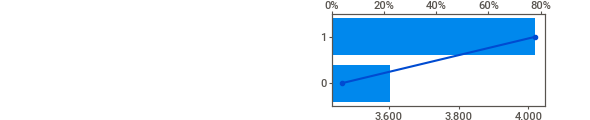
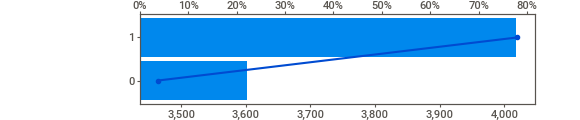
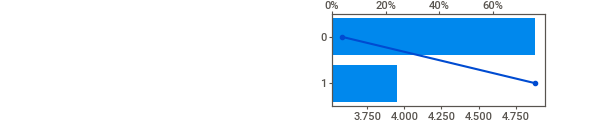
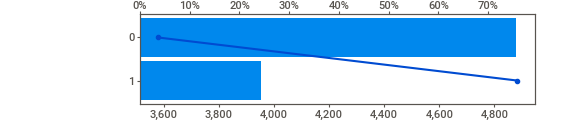
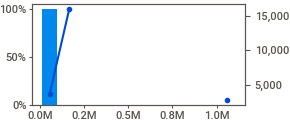
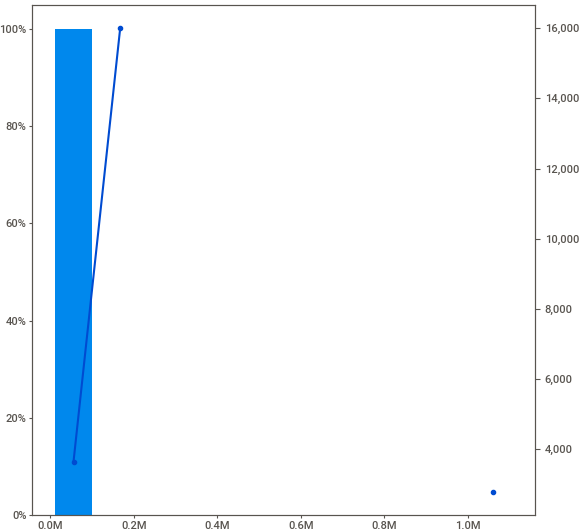
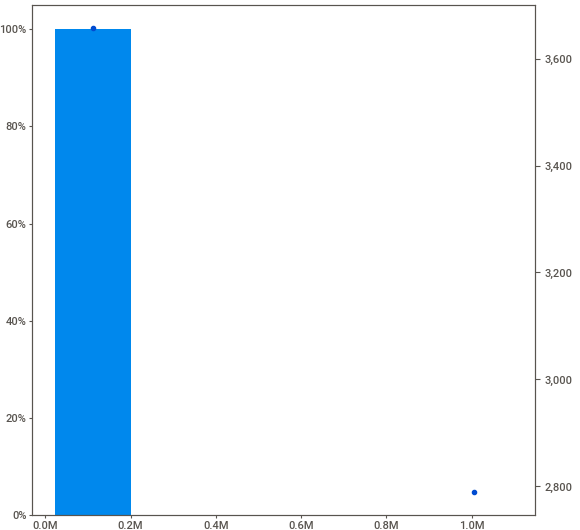
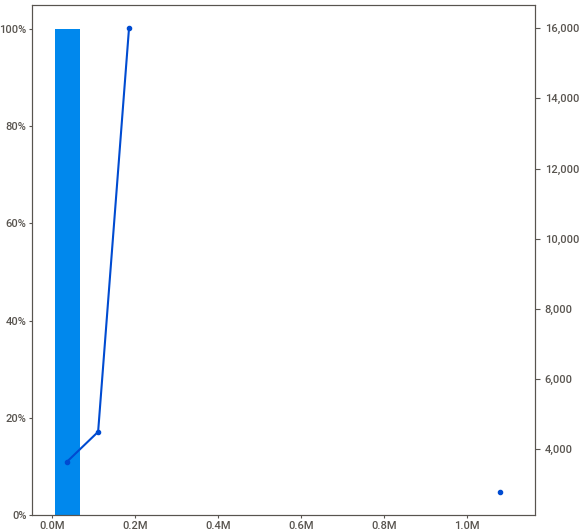
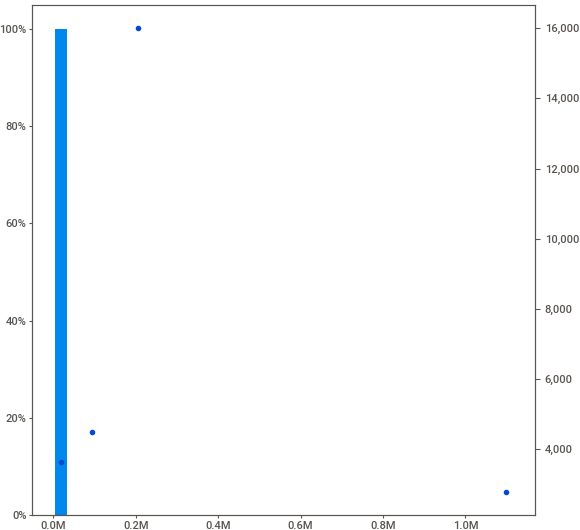
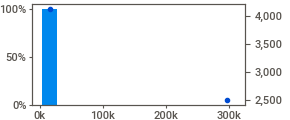
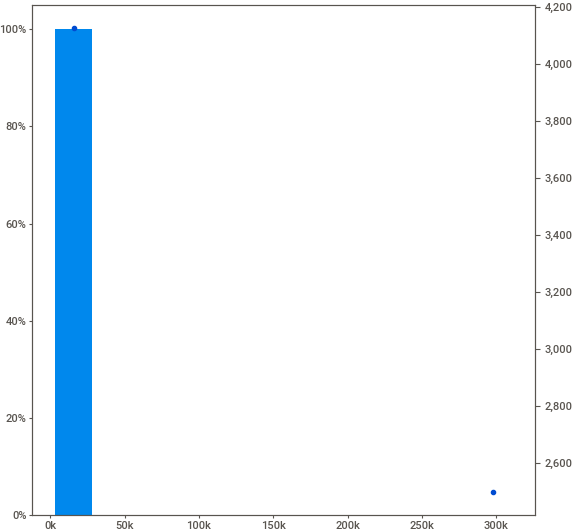
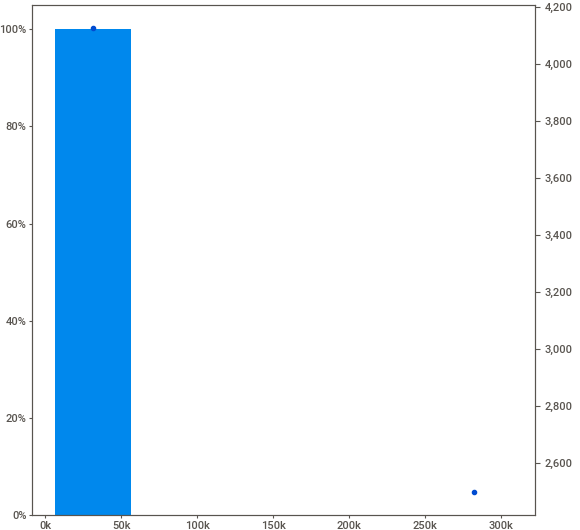
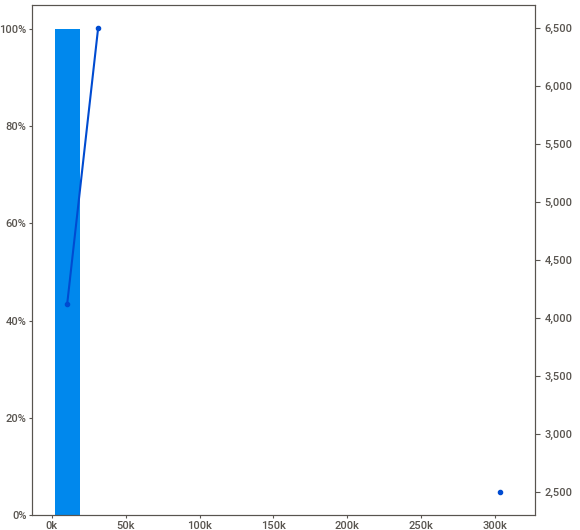
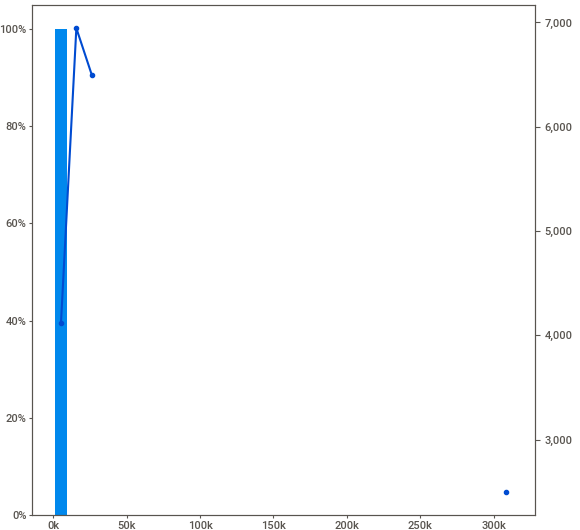
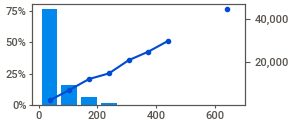
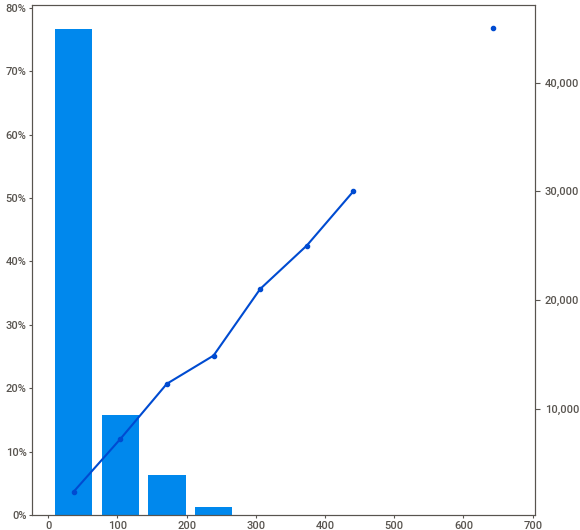
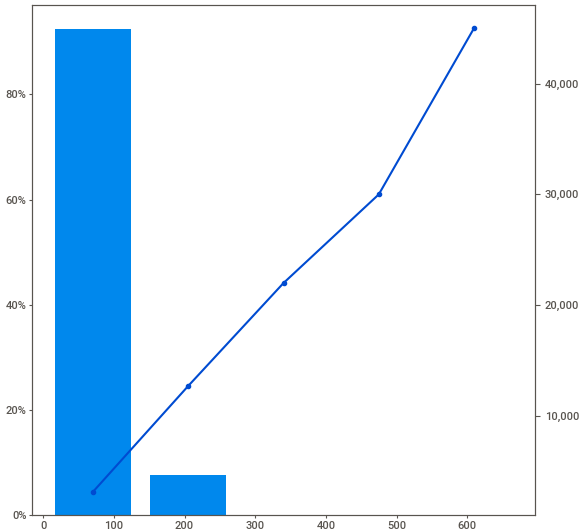
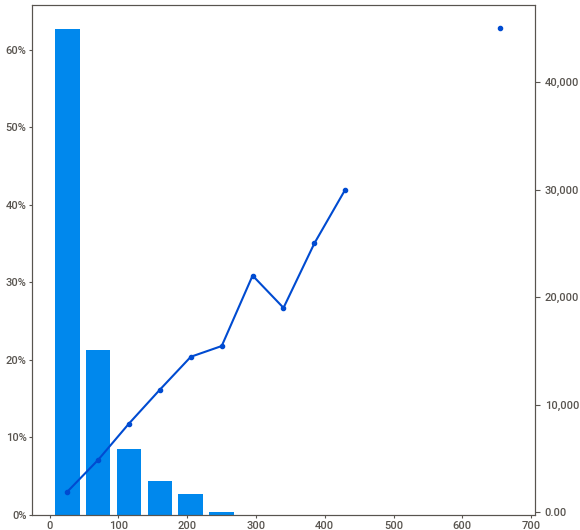
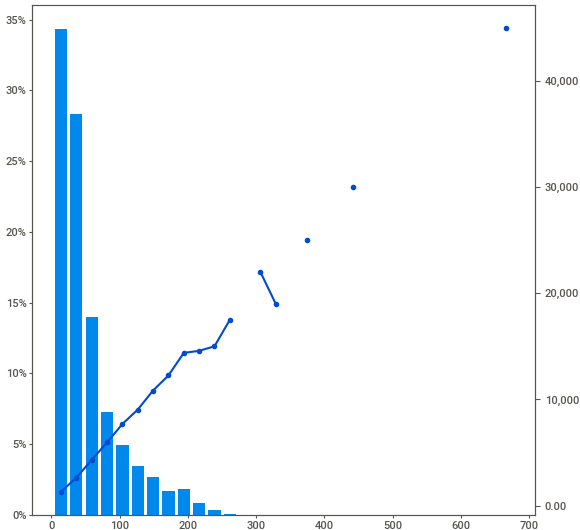
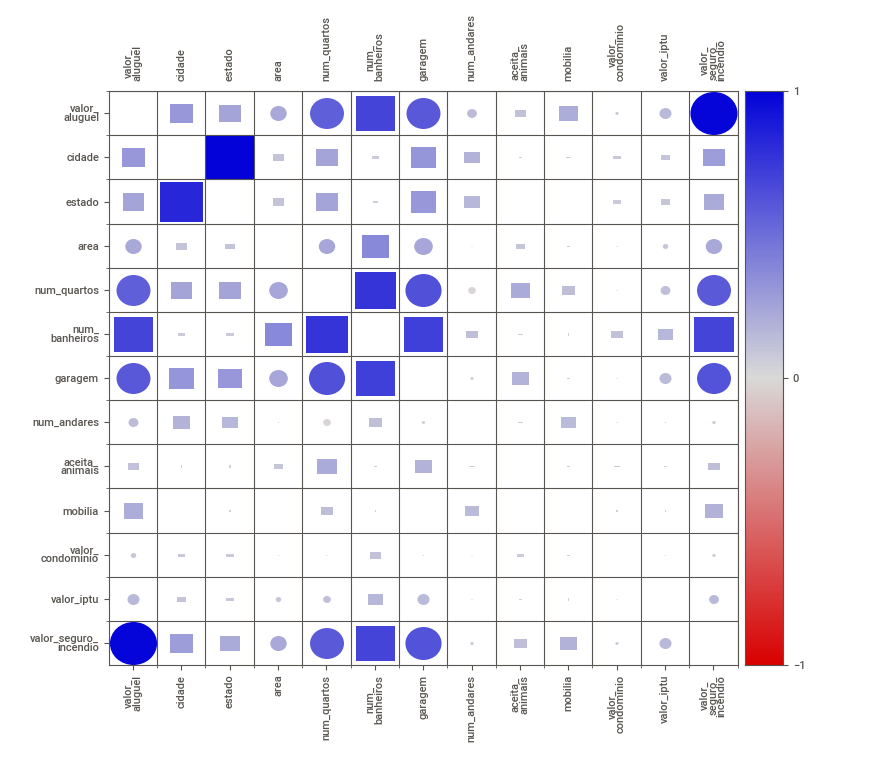
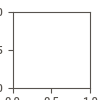

In [76]:
my_report.show_notebook()

# Como os valores de aluguel estão distribuidos?

Instalando o plotly para visualizações dinamicas

In [77]:
!pip3 install plotly

In [78]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(data, x="valor_aluguel", marginal="rug", hover_data=data.columns)
fig.show()

In [79]:
## dados estão com assimetria positiva, não seguem uma distribuição normal.

In [80]:
import plotly.express as px
fig = px.box(data, x="valor_aluguel", points="all")
fig.show()

Alguns insigths identificados...<br/>
1. Dados com uma assimetria positiva. <br/>
2. Possíveis outliers acima de 15.000,00. <br/>
3. A maioria dos valores estão na faixa de R$ 499 à 10.000,00.

To see the total column more clearly see the plot given below this confirms our inference about the data

<AxesSubplot:xlabel='valor_aluguel'>

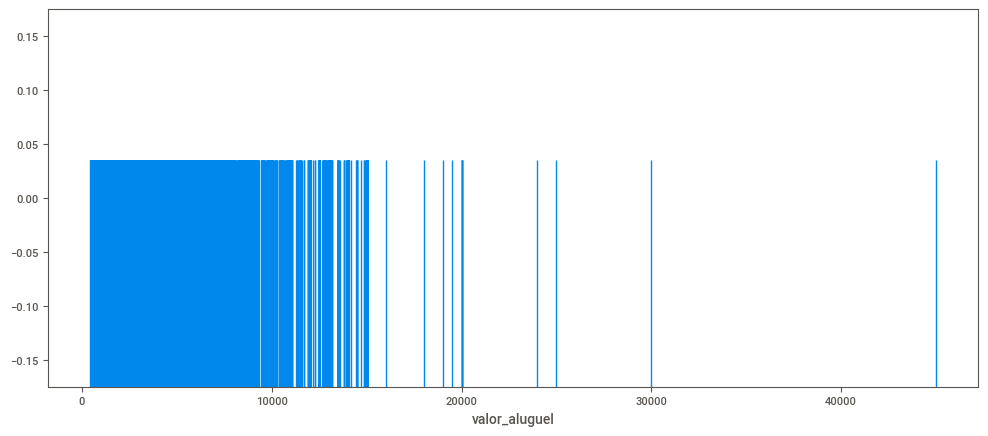

In [81]:
plt.figure(figsize =(12,5))
sns.rugplot(
            data['valor_aluguel'],
            height=0.6,    
            )

# Existe qualquer relação entre o número de quartos e o valor do aluguel?

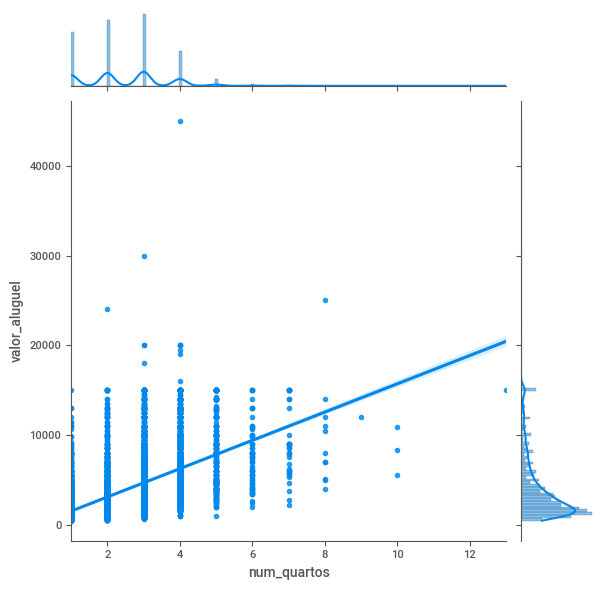

In [82]:
sns.jointplot(y= data['valor_aluguel'],x = data['num_quartos'],kind ='reg')

* Podemos observar que o número de quartos influencia no valor do aluguel.
* Os maiores imoveis mais caros são com números de quartos 3 e 4.
* Como uma regra geral temos uma relação positiva entre o número de imóveis e o valor do aluguel.

# O que podemos observar sobre a possibilidade de aceitar animais?

<AxesSubplot:xlabel='aceita_animais', ylabel='count'>

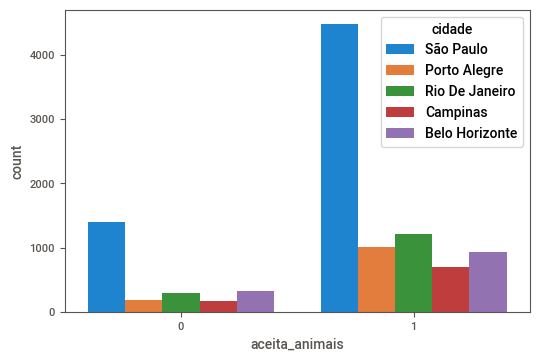

In [83]:
sns.countplot(x = data['aceita_animais']
              ,hue = data['cidade'])

In [84]:
data.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

* Podemos observar que o número de imóveis que aceitam animais é bem maior do que os que não aceitam.

In [85]:
data["animal_categorical"] =  data['aceita_animais'].map({1:"aceita",0:"nao_aceita"}) ## criando um novo atributo categórico para o atributo aceita_animais

<AxesSubplot:xlabel='valor_aluguel', ylabel='animal_categorical'>

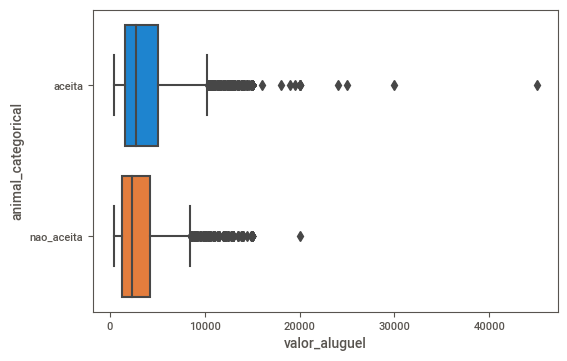

In [86]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['animal_categorical'])

* A maioria dos imóveis que aceitam animais, custam mais caros do que os que não aceitam.

# Cidades e os números de quartos

In [87]:
pd.DataFrame(data['cidade'].unique())

0
0       São Paulo
1    Porto Alegre
2  Rio De Janeiro
3        Campinas
4  Belo Horizonte

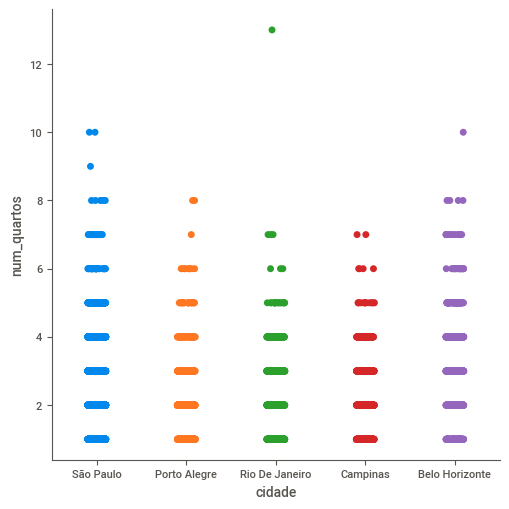

In [88]:
sns.catplot(x='cidade', y='num_quartos', data =data)

* Rio de Janeiro é a cidade que apresenta um imóvel com 12 quartos, ficando na frente dos demais estados.

# Como estão distribuidos os imóveis por número de banheiros?

<AxesSubplot:xlabel='num_banheiros', ylabel='count'>

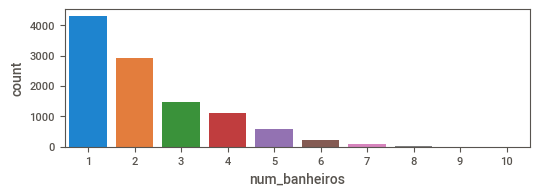

In [89]:
plt.subplot(2,1,1)
sns.countplot(x = data['num_banheiros'])

* A maioria dos imóveis contém de 1 a 2 banheiros.
* Existem poucos imóveis com 5 ou mais banheiros.

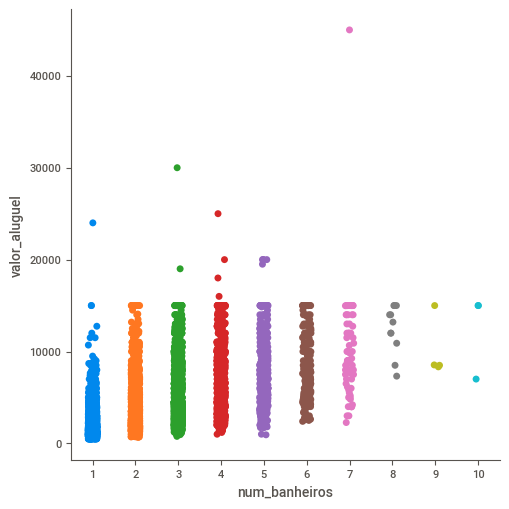

In [90]:
sns.catplot(x ='num_banheiros', y ='valor_aluguel', data = data)

* O maior aluguel é de um imóvel que tem 7 banheiros.
* Existem alugueis caros com imóveis com 1 a 4 banheiros.

# A mobília nos imoveis impactam no valor do aluguel?

In [91]:
data["mobilia_categorical"] =  data['mobilia'].map({1:"mobiliado",0:"nao_mobiliado"})

<AxesSubplot:xlabel='valor_aluguel', ylabel='mobilia_categorical'>

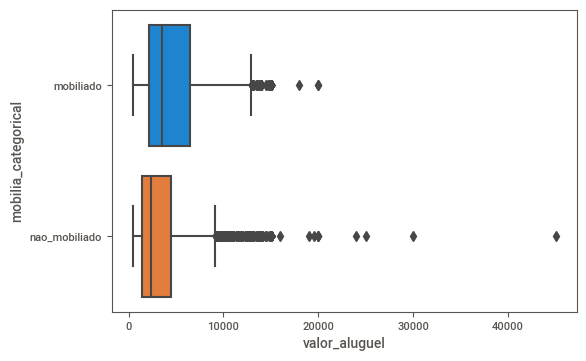

In [92]:
sns.boxplot( x = data['valor_aluguel']
            ,y = data['mobilia_categorical'])

* De todos os imóveis com valores maiores de aluguel, bem acima da média, são todos não mobiliados.
* O que justifica uma fraca correlação entre os atributos.

# Existe alguma relação entre o número de vagas de garagem e o valor do aluguel?

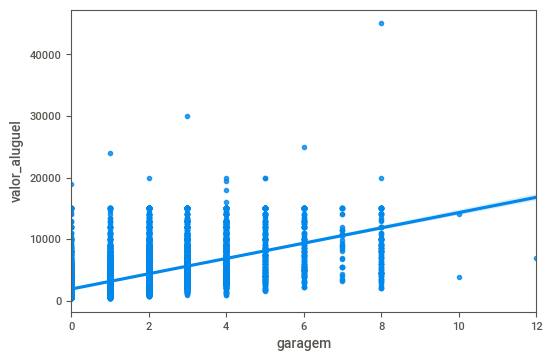

In [93]:
plt.figure(figsize =(6,4))
ax = sns.regplot(x = data['garagem'],y = data['valor_aluguel'])

<Figure size 600x400 with 0 Axes>

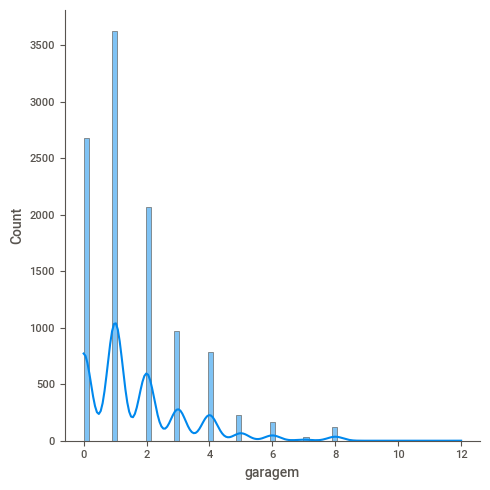

In [94]:
plt.figure(figsize =(6,4))
sns.displot(x = data['garagem'], kde = True)

Existe uma pequena correlação entre o número de vagas de garagem e o valor do aluguel.

# Vamos analisar o seguro incêndio

<AxesSubplot:xlabel='cidade', ylabel='valor_seguro_incendio'>

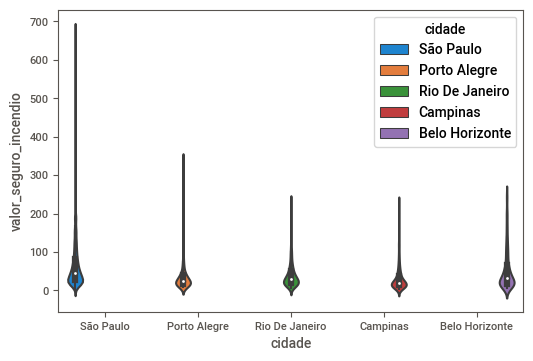

In [95]:
sns.violinplot(x ='cidade', y ='valor_seguro_incendio', data = data,hue ='cidade')

* São Paulo é a cidade com os maiores valores de seguro incêndio, seguido por Porto Alegre, Belo Horizonte, Rio de Janeiro e Campinas.

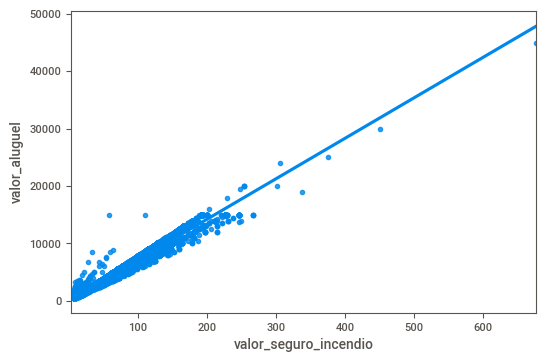

In [96]:
ax = sns.regplot(x = data['valor_seguro_incendio'],y = data['valor_aluguel'])

* Existe uma alta correlação entre o valor do seguro incendio e o valor do aluguel. 
* Quanto maior o valor do seguro incendio maior o valor do aluguel.

# Existe qualquer relação entre o valor do iptu e o valor do aluguel?

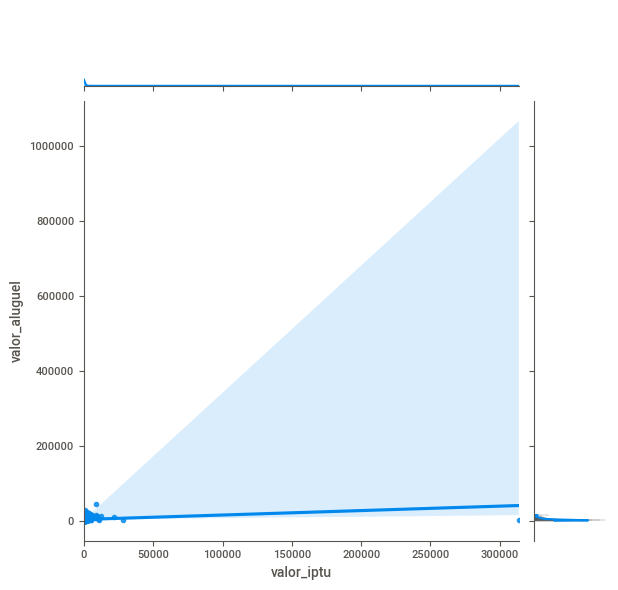

In [97]:
sns.jointplot(y= data['valor_aluguel'],x = data['valor_iptu'],kind ='reg')

* Não temos nenhum impacto

**Pré-processando os dados**

Poucos algoritmos trabalham com dados categóricos, por essas variáveis serem importantes para o nosso modelo precisamos transformar dados categóricos em dados numéricos para poder usar os algoritmos de Machine Learning

Podemos usar duas técnicas bem eficientes que são:

- **Label Encoder** (desvantagem: com o label encoder, pode-se inferir que as cidades têm ordem de importância...)
- **One Hot Enconder** (desvantagem: aumenta o tamanho da base e se torna inviável dependendo da quantidade de atributos)

Verificando a quantidade de valores únicos na coluna estado

In [98]:
data.estado.unique()

array(['SP', 'RS', 'RJ', 'MG'], dtype=object)

Verificando a quantidade de valores únicos na coluna cidade

In [99]:
data.cidade.unique()

array(['São Paulo', 'Porto Alegre', 'Rio De Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

Importando a biblioteca

**Aplicando o One Hot Encoder**

Substituindo o dataframe data pelo dataframe após aplicado o get_dummies()

In [100]:
data = pd.get_dummies(data, columns=["estado","cidade"], prefix=["estado_","cidade_"])

In [101]:
data.head()

area  num_quartos  num_banheiros  garagem  num_andares  aceita_animais  \
0    70            2              1        1            7               1   
1   320            4              4        0           20               1   
2    80            1              1        1            6               1   
3    51            2              1        0            2               1   
4    25            1              1        0            1               0   

   mobilia  valor_aluguel  valor_condominio  valor_iptu  ...  \
0        1           3300              2065         211  ...   
1        0           4960              1200        1750  ...   
2        0           2800              1000           0  ...   
3        0           1112               270          22  ...   
4        0            800                 0          25  ...   

   mobilia_categorical estado__MG estado__RJ  estado__RS  estado__SP  \
0            mobiliado          0          0           0           1   
1        nao_mobiliado          0          0           0           1   
2        nao_mobiliado          0          0           1           0   
3        nao_mobiliado          0          0           1           0   
4        nao_mobiliado          0          0           0           1   

   cidade__Belo Horizonte  cidade__Campinas  cidade__Porto Alegre  \
0                       0                 0                     0   
1                       0                 0                     0   
2                       0                 0                     1   
3                       0                 0                     1   
4                       0                 0                     0   

   cidade__Rio De Janeiro  cidade__São Paulo  
0                       0                  1  
1                       0                  1  
2                       0                  0  
3                       0                  0  
4                       0                  1  

[5 rows x 22 columns]

# Amanhã...

# Detecção de Outliers, Machine Learning, Deploy